## **TelecomX**

#### **Extracción**

In [91]:
import pandas as pd
import ast

In [92]:
df = pd.read_json('../data/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [94]:
def expandir_columns(df, column_name):
    # convertir strings a dictionaries
    df[column_name] = df[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    # expandir el column_name en múltiples columnas 
    columns_expanded = pd.json_normalize(df[column_name])

    # usar directamente los nombres de las claves sin prefijo
    # columns_expanded.columns ya contiene los nombres de las claves

    # eliminar la columna original y concatenar las nuevas
    df.drop(column_name, axis=1, inplace=True)
    df[columns_expanded.columns] = columns_expanded

columnas_anidadas = ['customer', 'phone', 'internet', 'account']
for col in columnas_anidadas:
    expandir_columns(df, col)

In [95]:
df.head(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


#### **Transformacion de datos**

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [97]:
import numpy as np

In [98]:
columnas_numericas = ['SeniorCitizen', 'tenure']
df[columnas_numericas] = df[columnas_numericas].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [99]:
df_vacios_churn = df[df['Churn'].str.strip() == '']
print(f"Filas con 'Churn' vacío: {len(df_vacios_churn)}")

Filas con 'Churn' vacío: 224


In [100]:
cols_interes = [
    'customerID', 'tenure', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'Charges.Monthly', 'Charges.Total'
]

df_vacios_churn[cols_interes].head(10)

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
219,0328-IBUPK,51,No,No phone service,DSL,Yes,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),34.20,1782
312,0448-YZNZE,27,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.55,2510.2
351,0510-EXSMQ,9,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,69.05,651.5
368,0530-HBKHZ,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8
374,0534-JRNIG,6,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.4


In [101]:
# Reemplazar valores vacíos en la columna 'Churn'
df['Churn'] = df['Churn'].replace('', 'Desconocido')
df['Churn'] = df['Churn'].str.strip()  # Limpiar espacios adicionales

In [102]:
df.sample(20)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4812,6591-QGOYB,No,Male,0,No,No,17,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),106.65,1672.1
1202,1722-LDZJS,No,Male,0,Yes,Yes,53,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.20,1068.15
238,0361-HJRDX,No,Female,0,No,No,68,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),64.35,4539.6
3158,4402-FTBXC,No,Male,0,No,No,54,Yes,No,Fiber optic,...,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,89.80,4667
4131,5656-MJEFC,No,Male,0,Yes,Yes,42,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),48.15,2032.3
7207,9917-KWRBE,No,Female,0,Yes,Yes,41,Yes,Yes,DSL,...,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.2
235,0356-ERHVT,No,Male,0,Yes,No,11,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.90,521.9
5038,6892-EZDTG,Yes,Female,0,Yes,No,4,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,91.65,365.4
840,1194-SPVSP,No,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.65,19.65
6966,9592-ERDKV,No,Male,0,Yes,No,37,Yes,Yes,DSL,...,No,Yes,No,Yes,Yes,One year,No,Mailed check,79.25,2911.8


In [103]:
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)

In [104]:
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [106]:
df['Charges.Total'] = df['Charges.Total'].fillna(0.0)

In [107]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

In [108]:
col_binarias = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',]

for col in col_binarias:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

C:\Users\skybl\AppData\Local\Temp\ipykernel_22908\3794305891.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [110]:
for col in col_binarias:
    print(f"Valores únicos en '{col}':")
    print(df[col].unique())
    print()


Valores únicos en 'Partner':
[1 0]

Valores únicos en 'Dependents':
[1 0]

Valores únicos en 'PhoneService':
[1 0]

Valores únicos en 'MultipleLines':
[0 1 'No phone service']

Valores únicos en 'OnlineSecurity':
[0 1 'No internet service']

Valores únicos en 'OnlineBackup':
[1 0 'No internet service']

Valores únicos en 'DeviceProtection':
[0 1 'No internet service']

Valores únicos en 'TechSupport':
[1 0 'No internet service']

Valores únicos en 'StreamingTV':
[1 0 'No internet service']

Valores únicos en 'StreamingMovies':
[0 1 'No internet service']

Valores únicos en 'PaperlessBilling':
[1 0]



#### **Análisis**

In [111]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
sns.set_theme(style="whitegrid")

C:\Users\skybl\AppData\Local\Temp\ipykernel_19336\316675460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs = sns.countplot(data=df, x='Churn', palette='Set2', legend=False)


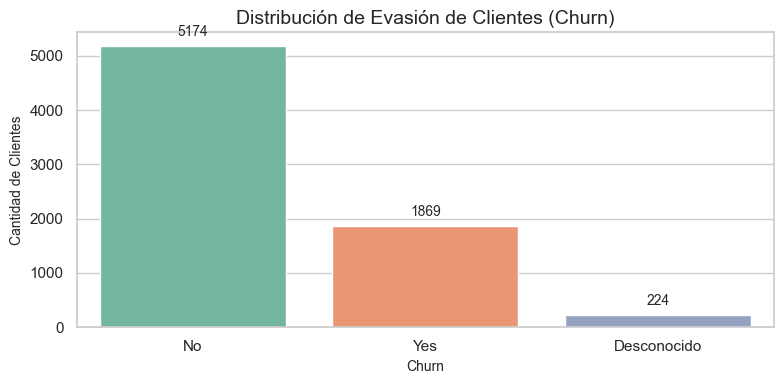

In [26]:
fig, axs = plt.subplots(figsize=(8, 4))

axs = sns.countplot(data=df, x='Churn', palette='Set2', legend=False)
axs.set_title('Distribución de Evasión de Clientes (Churn)', fontsize=14)
axs.set_xlabel('Churn', fontsize=10)
axs.set_ylabel('Cantidad de Clientes', fontsize=10)

for bar in axs.patches:
    height = bar.get_height()
    axs.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Desplazamiento hacia arriba
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout() 
plt.show()